In [1]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd

In [2]:
CG = pickle.load(open('data/location/IL_graph.dat', 'rb'))
handler = pickle.load(open('data/location/graph_handler.dat', 'rb'))

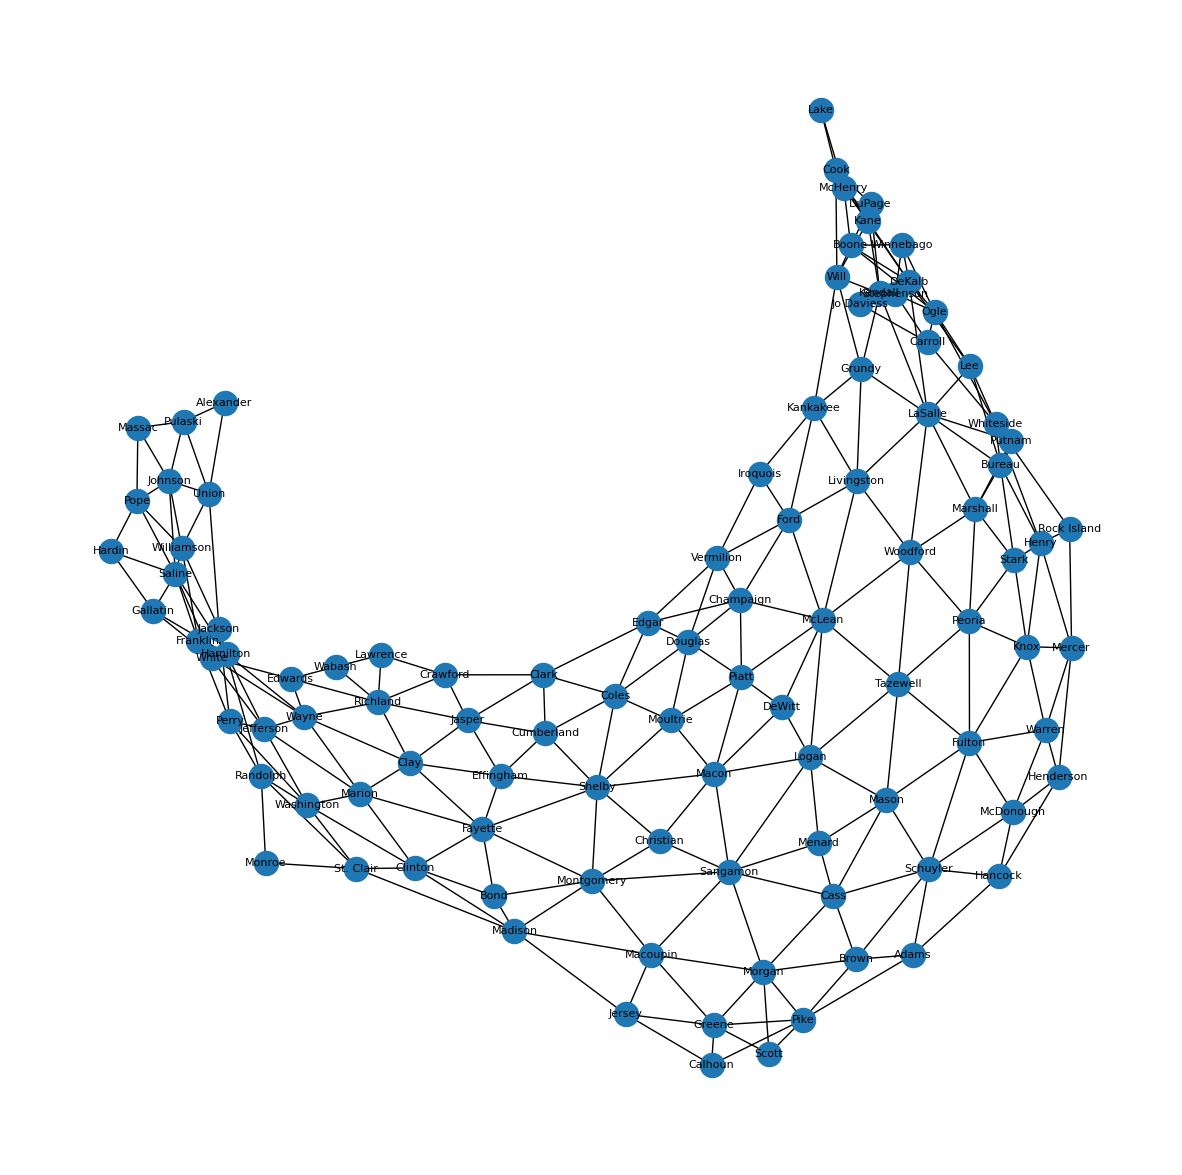

In [38]:
labels = {node: handler[node.name].name for node in CG.nodes()}
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(CG, pos, ax=ax)
nx.draw_networkx_labels(CG, pos, labels=labels, font_size=8, ax=ax)

fig, ax = plt.subplots(figsize=(15,8))
G = nx.from_pandas_edgelist(counties, 'origin', 'destination', create_using=nx.Graph())
nx.draw(G, with_labels=True)
plt.show()

<Axes: >

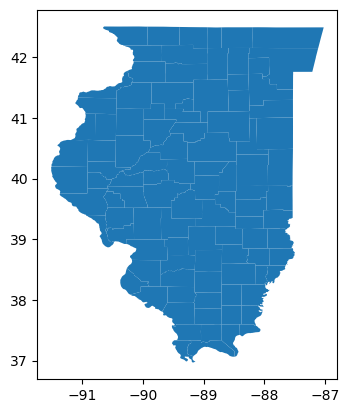

In [26]:
gdf = gpd.GeoDataFrame({'geometry': [handler[county].geometry for county in handler]})
gdf.plot()

Test = County(0, 0, 0, 100, 'Test')
print(Test)

In [46]:
counties_set = set(counties['origin'])  # Using set to remove redundancies

In [52]:
population_dict = open('data/county_populations.json', 'r')
counties_population = json.load(population_dict)

In [ ]:
# counties = pd.read_csv('data/counties_parsed.csv')
#
# fig, ax = plt.subplots(figsize=(15,8))
# G = nx.from_pandas_edgelist(counties, 'origin', 'destination', create_using=nx.Graph())
# nx.draw(G, with_labels=True)
# plt.show()

Well it doesn't LOOK like illinois... 